In [1]:
# purpose: 

# re-plot data showing EX1 behavior for peptides in the N and C terminus of Ras

# two experimental replicates for Ras done manually:
# 2/3/21-2/6/21 and 2/16/21-2/19/21 
# selected peptide data located within: 
# WT_Ras_rep1_hdxms_peptide_spectra
# WT_Ras_rep2_hdxms_peptide_spectra

# peptides plotted in supplement:
# 6-16
# 6-19
# 6-20
# 155-159
# 155-161

# Note that time points are set to idealized times. The corresponding time points are:
# Replicate 1 idealized times followed by actual times 
# :16 -> :20 
# :32 -> :35
# 1:04 -> 1:04
# 2:08 -> 2:08
# 4:16 -> 4:18
# 8:32 -> 8:32
# 17:04 -> 17:14
# 34:08 -> 34:08
# 1:08:16 -> 1:04:16
# 2:16:32 -> 2:01:00
# 4:33:04 -> 4:33:04 
# 9:06:08 -> 9:17:00 
# 18:12:16 -> 18:13:10
# 24 -> 24:00:00
# 48 -> 48:39:20 

In [2]:
import numpy as np
import pandas as pd

from os import path
from os import listdir

import os
import os.path

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

from collections import OrderedDict

In [3]:
# monoisotopic mass library, from ExPASY: https://web.expasy.org/findmod/findmod_masses.html#AA

monoisomass_calc_lib = {'A' : 71.0788, 'R' : 156.10111, 'N' : 114.04293, 'D' : 115.02694, 'C' : 103.00919, 'E' : 129.04259, 'Q' : 128.05858, 'G' : 57.02146, 'H' : 137.05891, 'I' : 113.08406, 'L' : 113.08406, 'K' : 128.09496, 'M' : 131.04049, 'F' : 147.06841, 'P' : 97.05276, 'S' : 87.03203, 'T' : 101.04768, 'W' : 186.07931, 'Y' : 163.06333, 'V' : 99.06841}

def calc_pep_mass(pep_seq):
    mass = 18.01056
    for i in pep_seq:
        new_mass = monoisomass_calc_lib[i]
        mass += float(new_mass)
    return mass

In [4]:
DataPath = 'WT_Ras_rep1_hdxms_peptide_spectra/'
peptide_dirs = listdir(DataPath)
try:
    peptide_dirs.remove('.DS_Store')
except Exception:
    pass
print(peptide_dirs)

peptides = {} # a dictionary with peptide data
for pep_dir in peptide_dirs:
    start, end, seq = pep_dir.split('-')
    peptides[(int(start), int(end))] = seq
    
sorted_peptides = sorted(peptides)
print(sorted_peptides)

sorted_pep_dirs = sorted(peptide_dirs)
print(sorted_pep_dirs)

['0081-0090-VFAINNTKSF', '0155-0161-AFYTLVR', '0053-0067-LDILDTAGQEEYSAM', '0091-0099-EDIHQYREQ', '0155-0159-AFYTL', '0020-0039-TIQLIQNHFVDEYDPTIEDS', '0038-0052-DSYRKQVVIDGETCL', '0006-0019-LVVVGAGGVGKSAL', '0120-0144-LAARTVESRQAQDLARSYGIPYIET', '0114-0120-VGNKCDL', '0006-0016-LVVVGAGGVGK', '0145-0156-SAKTRQGVEDAF', '0006-0020-LVVVGAGGVGKSALT', '0160-0166-VREIRQH', '0068-0080-RDQYMRTGEGFLC', '0099-0113-QIKRVKDSDDVPMVL']
[(6, 16), (6, 19), (6, 20), (20, 39), (38, 52), (53, 67), (68, 80), (81, 90), (91, 99), (99, 113), (114, 120), (120, 144), (145, 156), (155, 159), (155, 161), (160, 166)]
['0006-0016-LVVVGAGGVGK', '0006-0019-LVVVGAGGVGKSAL', '0006-0020-LVVVGAGGVGKSALT', '0020-0039-TIQLIQNHFVDEYDPTIEDS', '0038-0052-DSYRKQVVIDGETCL', '0053-0067-LDILDTAGQEEYSAM', '0068-0080-RDQYMRTGEGFLC', '0081-0090-VFAINNTKSF', '0091-0099-EDIHQYREQ', '0099-0113-QIKRVKDSDDVPMVL', '0114-0120-VGNKCDL', '0120-0144-LAARTVESRQAQDLARSYGIPYIET', '0145-0156-SAKTRQGVEDAF', '0155-0159-AFYTL', '0155-0161-AFYTLVR', 

In [5]:
def plot_peptide_spectra(pep_entry, f): # pep_entry is a tuple of the start and end positions
    """
    Part 1: get array of csv files containing spectra exported from HDE for a given peptide
    Part 2: get list of ordered time points & ordered csv files
    Part 3: plot spectra for a given peptide 
    
    'global variables' sorted_peptides, sorted_pep_dirs, DataPath defined in earlier block
    """
    pepID = sorted_peptides.index(pep_entry)  
    print(pepID)

    data_dir = sorted_pep_dirs[pepID]
    print(data_dir)
    csv_inputs = []
    for csv in listdir(os.path.join(DataPath, data_dir)):
        if '.csv' not in csv:
            continue
        timepoint = csv.strip(".csv")
        chargestate = timepoint.split("-")[-1]
        HDex_charge = int(chargestate.split("z")[-1])
        csv_inputs.append(csv)
    print("charge: ", HDex_charge) 

    print(csv_inputs)
    csv_array = np.array(csv_inputs)
    
    # get ordered time points & ordered csvs
    time_points = []
    for csv in csv_inputs:
        parts = csv.split('-')
        if parts[0]=="Non":
            time_points.append(0)
        else:
            time_points.append(int(parts[0].strip('s')))
    timepoints_order = np.argsort(time_points)
    ordered_csv_inputs = list(csv_array[timepoints_order])
    ordered_time_points = sorted(time_points)

    print(ordered_time_points)
    
    # plot spectra

    plt.figure(f, figsize=(4,36))
    for i,t in enumerate(ordered_time_points):
        INFILE = os.path.join(DataPath,data_dir,ordered_csv_inputs[i])
        try:
            df = pd.read_csv(INFILE)
            df.columns=['Mass', 'Intensity']
            plt.subplot(len(time_points),1,i+1)
            plt.plot(df['Mass'], df['Intensity'], color='teal')
            if t==0: # set the x axis based on the mass for time 0
                xmax = max(df['Mass'])
                xmin = min(df['Mass'])
                plt.title(sorted_peptides[pepID], fontsize=14)
            plt.xlim(xmin,xmax+0.4*(xmax-xmin))
            if i < len(ordered_time_points) - 1:
                plt.xticks([])
            plt.xticks(fontsize=10)
        except Exception:
            pass
    

In [6]:
EX1_peptides = [(6, 16), (6, 19), (6, 20), (155, 159), (155, 161)]
EX2_peptides = [(20, 39), (38, 52), (53, 67), (68, 80), (81, 90), (91, 99), (99, 113), (114, 120), (120, 144), (145, 156), (160, 166)]

0
0006-0016-LVVVGAGGVGK
charge:  2
['2048s-1-z2.csv', '64s-1-z2.csv', '512s-1-z2.csv', '128s-1-z2.csv', '1024s-1-z2.csv', '65536s-1-z2.csv', '16384s-1-z2.csv', '86400s-1-z2.csv', '32768s-1-z2.csv', '8192s-1-z2.csv', 'Non-D-1-z2.csv', '256s-1-z2.csv', '16s-1-z2.csv', '4096s-1-z2.csv']
[0, 16, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 86400]
1
0006-0019-LVVVGAGGVGKSAL
charge:  2
['2048s-1-z2.csv', '64s-1-z2.csv', '512s-1-z2.csv', '128s-1-z2.csv', '1024s-1-z2.csv', '65536s-1-z2.csv', '16384s-1-z2.csv', '86400s-1-z2.csv', '32768s-1-z2.csv', '8192s-1-z2.csv', 'Non-D-1-z2.csv', '256s-1-z2.csv', '16s-1-z2.csv', '4096s-1-z2.csv']
[0, 16, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 86400]
2
0006-0020-LVVVGAGGVGKSALT
charge:  2
['2048s-1-z2.csv', '64s-1-z2.csv', '512s-1-z2.csv', '128s-1-z2.csv', '1024s-1-z2.csv', '65536s-1-z2.csv', '16384s-1-z2.csv', '86400s-1-z2.csv', '32768s-1-z2.csv', '8192s-1-z2.csv', 'Non-D-1-z2.csv', '256s-1-z2.csv', '16s-1-z2.csv'

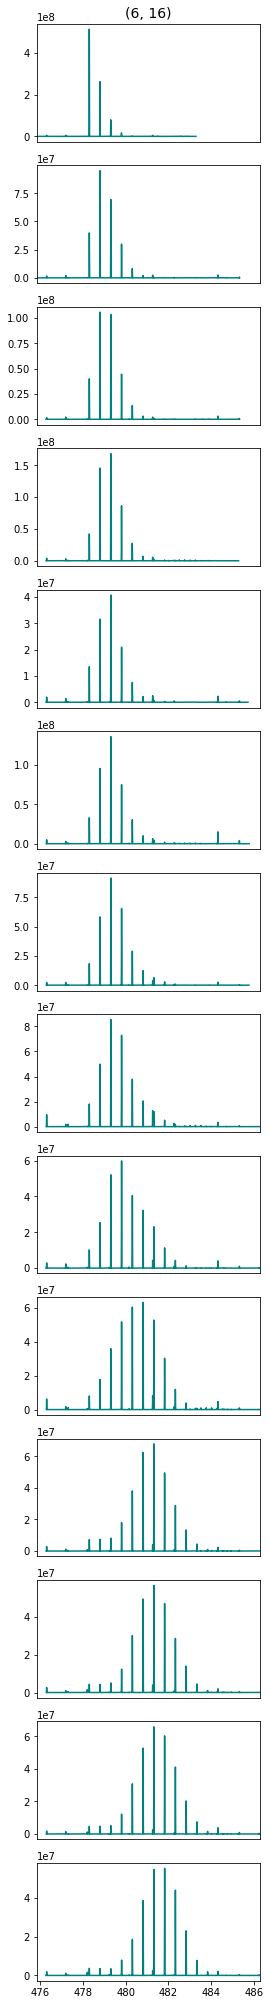

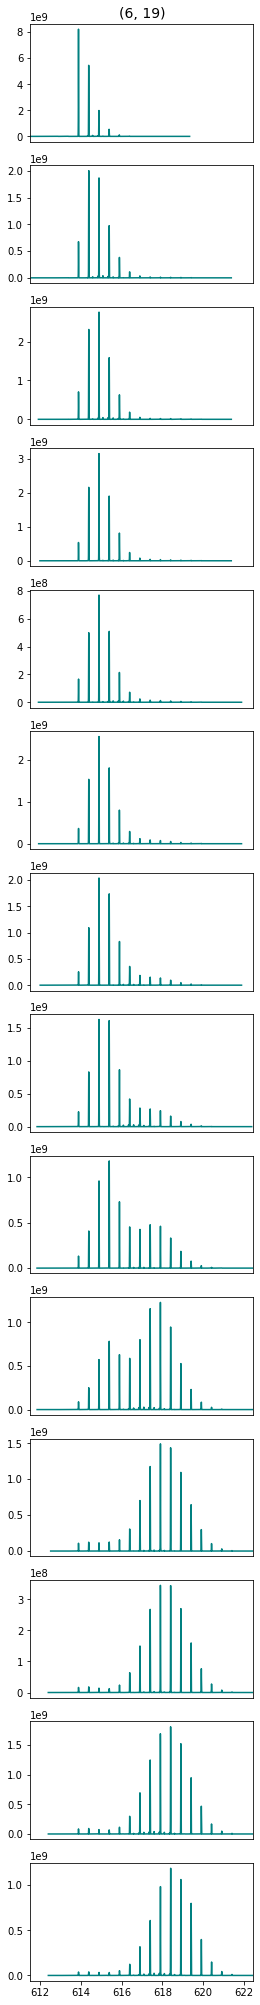

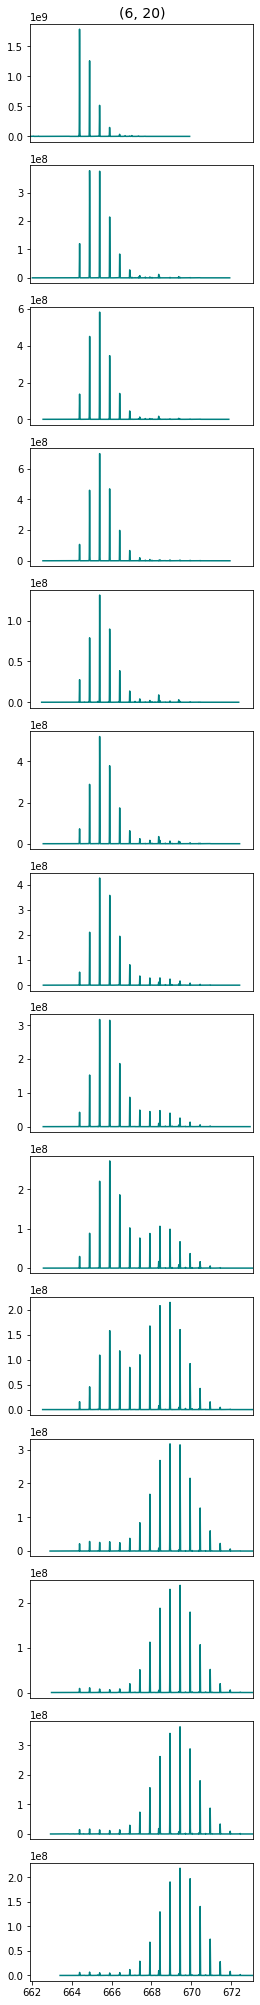

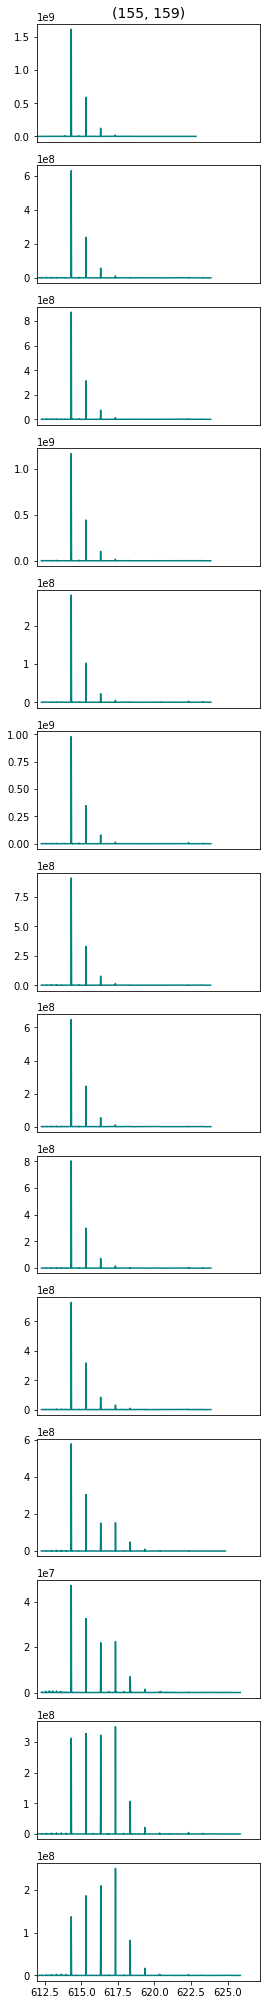

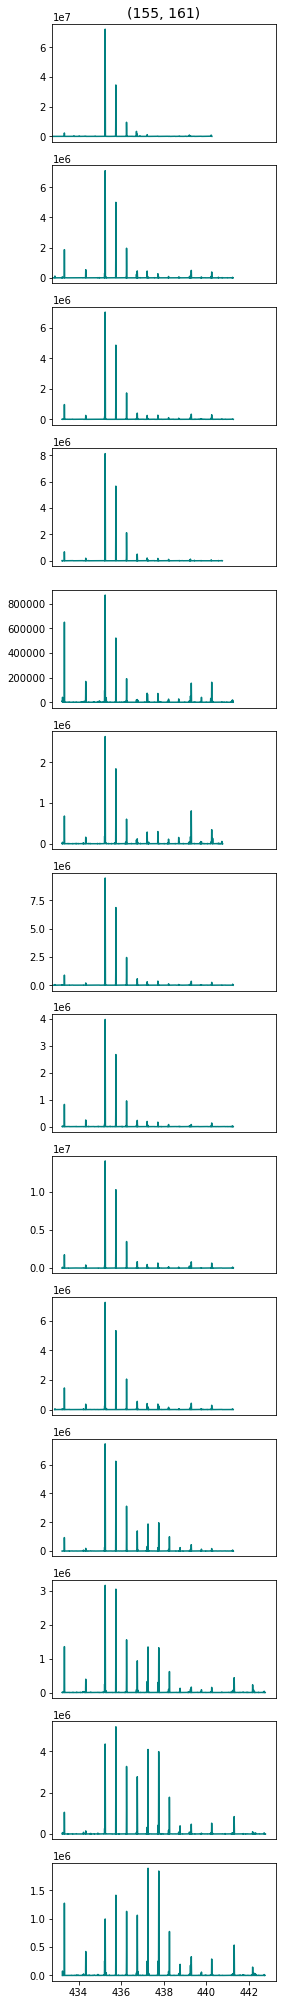

In [7]:
for f,pep in enumerate(EX1_peptides):
    plot_peptide_spectra(pep, f)

3
0020-0039-TIQLIQNHFVDEYDPTIEDS
charge:  3
['64s-1-z3.csv', '2048s-1-z3.csv', '512s-1-z3.csv', '128s-1-z3.csv', '1024s-1-z3.csv', '65536s-1-z3.csv', '16384s-1-z3.csv', '32768s-1-z3.csv', '86400s-1-z3.csv', '8192s-1-z3.csv', 'Non-D-1-z3.csv', '16s-1-z3.csv', '256s-1-z3.csv', '4096s-1-z3.csv']
[0, 16, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 86400]
4
0038-0052-DSYRKQVVIDGETCL
charge:  3
['64s-1-z3.csv', '2048s-1-z3.csv', '512s-1-z3.csv', '128s-1-z3.csv', '1024s-1-z3.csv', '65536s-1-z3.csv', '16384s-1-z3.csv', '32768s-1-z3.csv', '86400s-1-z3.csv', '8192s-1-z3.csv', 'Non-D-1-z3.csv', '16s-1-z3.csv', '256s-1-z3.csv', '4096s-1-z3.csv']
[0, 16, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 86400]
5
0053-0067-LDILDTAGQEEYSAM
charge:  2
['2048s-1-z2.csv', '64s-1-z2.csv', '512s-1-z2.csv', '128s-1-z2.csv', '1024s-1-z2.csv', '65536s-1-z2.csv', '16384s-1-z2.csv', '86400s-1-z2.csv', '32768s-1-z2.csv', '8192s-1-z2.csv', 'Non-D-1-z2.csv', '256s-1-z2.csv', '16s

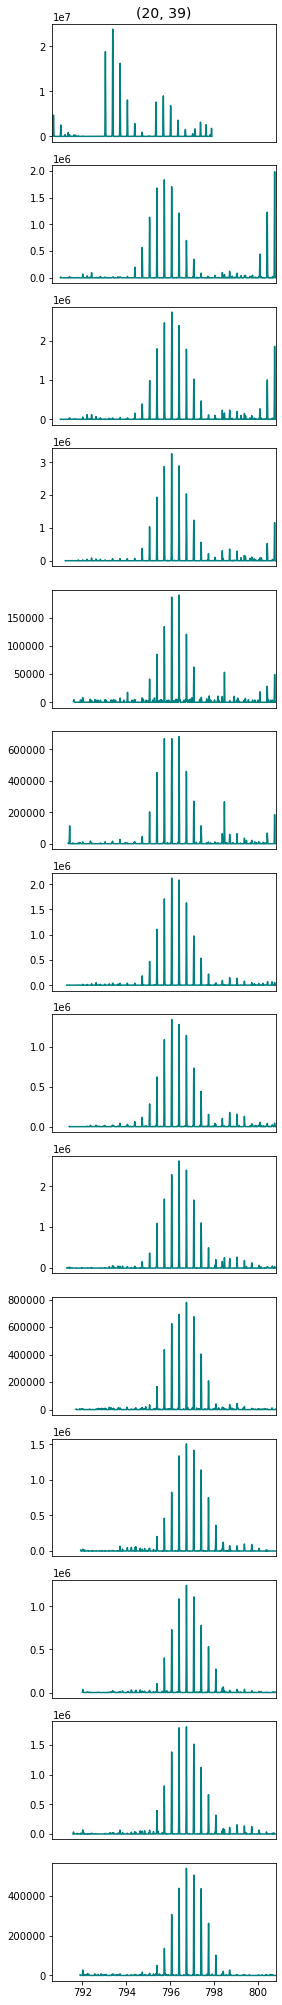

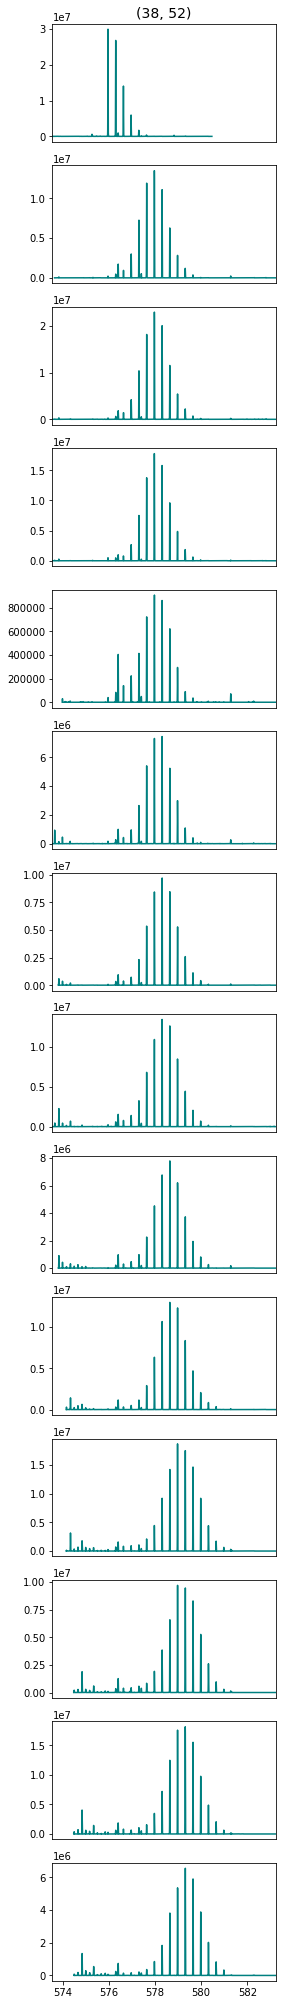

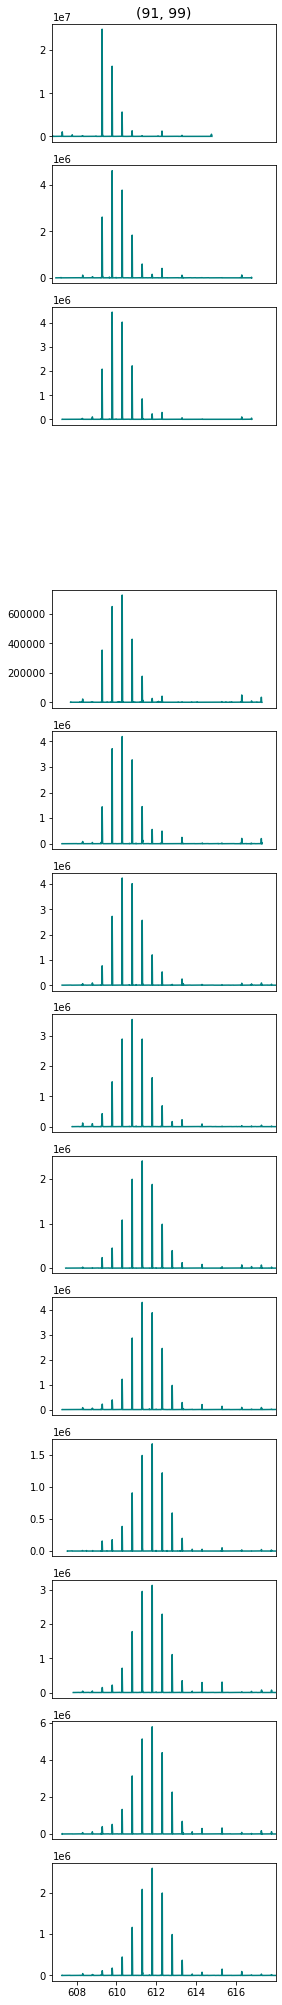

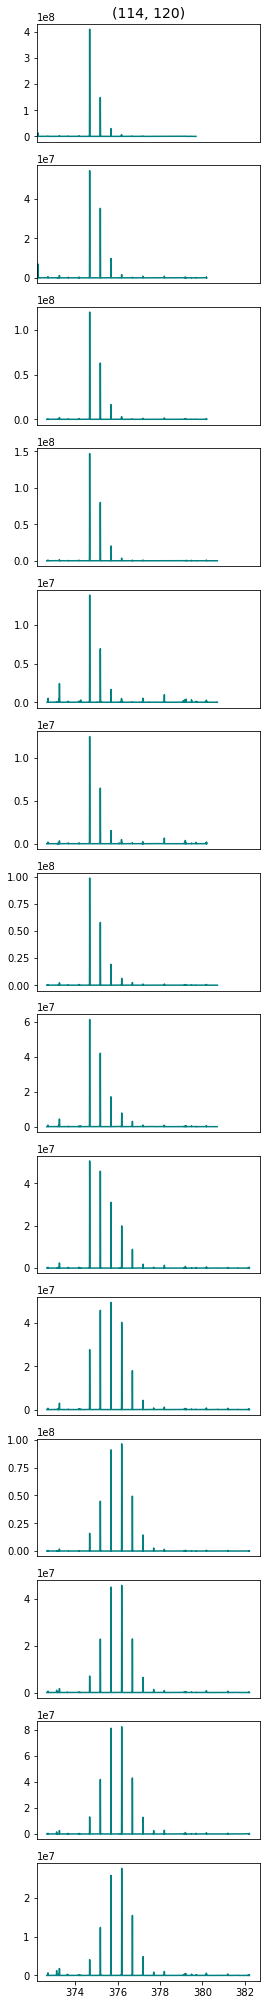

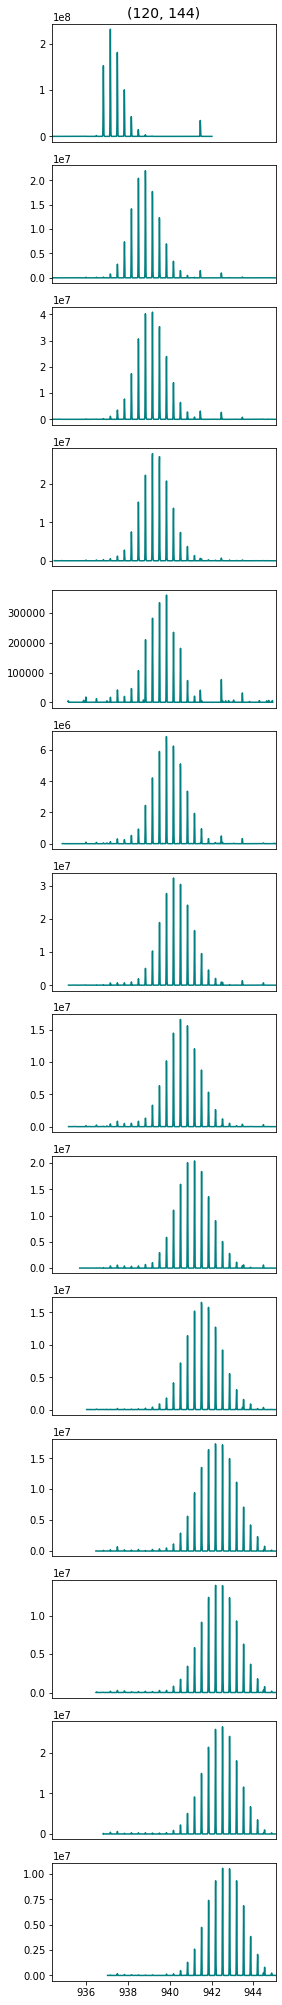

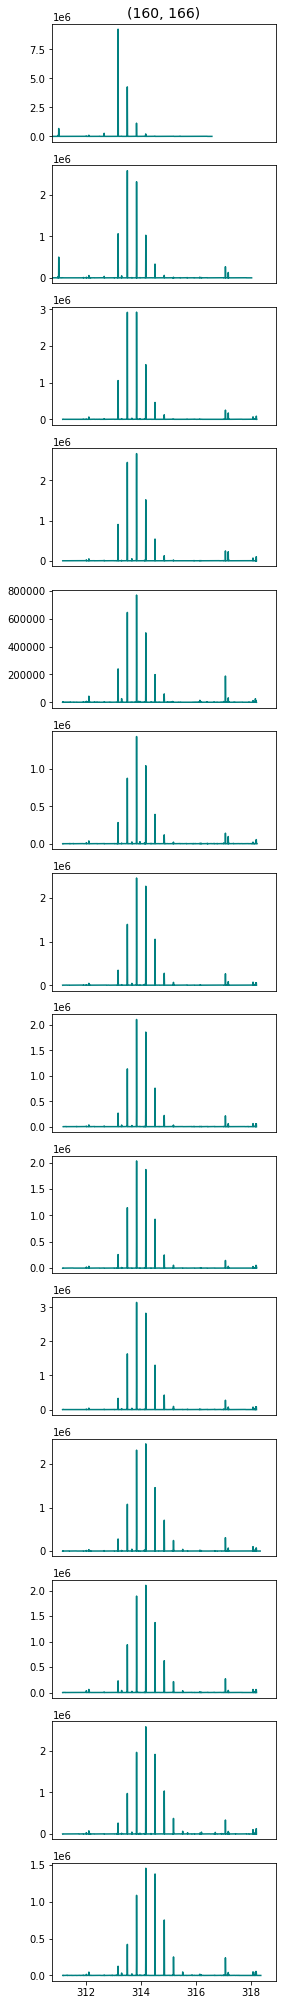

In [8]:
for f,pep in enumerate(EX2_peptides):
    plot_peptide_spectra(pep, f)
    
# Note that matplotlib automatically scales the y-axis by the maximum intensity in that m/z window
# May see changes in y-axis amplitude as a result

In [9]:
df['Intensity']

NameError: name 'df' is not defined